# Dfs1

Dfs1 has in addition to the dfs0 file a single spatial dimension.

This spatial dimension has information on the grid spacing, but do not contain enough metadata to determine their geographical position, but have a relative distance from the origo.

See [Dfs1 in MIKE IO Documentation](https://dhi.github.io/mikeio/user-guide/dfs1.html)

See [DFS - Reference manual](https://docs.mikepoweredbydhi.com/core_libraries/dfs/dfs-file-system/)

In [1]:
import mikeio

In [2]:
ds = mikeio.read(r".\waterlevel_north.dfs1")
ds

<mikeio.Dataset>
dims: (time:577, x:2)
time: 1993-12-02 00:00:00 - 1993-12-14 00:00:00 (577 records)
geometry: Grid1D (n=2, dx=8800)
items:
  0:  North WL <Water Level> (meter)

In [3]:
ds.geometry

<mikeio.Grid1D>
x: [0, 8800] (nx=2, dx=8800)

This dfs1 file contains only two nodes (`nx=2`) and has a grid spacing of 8800 m.

The dataset has a single item `North WL` which we can access in three different ways.

1. As an attribute `ds.North_WL`
2. As a key in a dictionary `ds["North WL"]`
2. By position `ds[0]`

In [4]:
da = ds.North_WL
da

<mikeio.DataArray>
name: North WL
dims: (time:577, x:2)
time: 1993-12-02 00:00:00 - 1993-12-14 00:00:00 (577 records)
geometry: Grid1D (n=2, dx=8800)

The dataarray variable `da` contains all the data for the `North WL` item from the dfs1 file.

## Visualization

The data can be visualized with the `.plot()` method.

The default plot show time on the vertical axis and space on the horizontal axis since dfs1 are often used to represent horizontal variations along an open boundary.

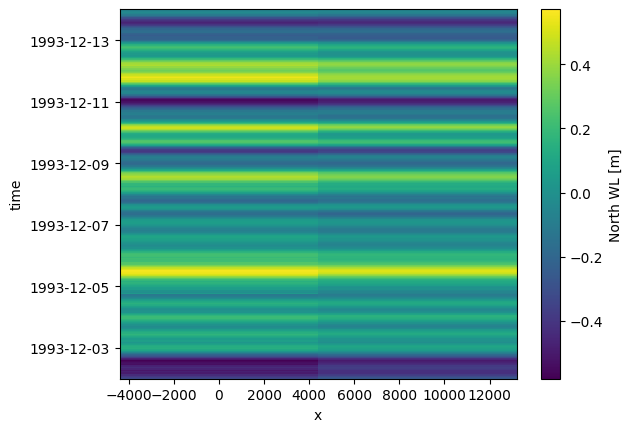

In [5]:
da.plot();

Fort this example, with only a few nodes on the spatial axis, it makes more sense to visualize the data as individual lines in a timeseries plot.

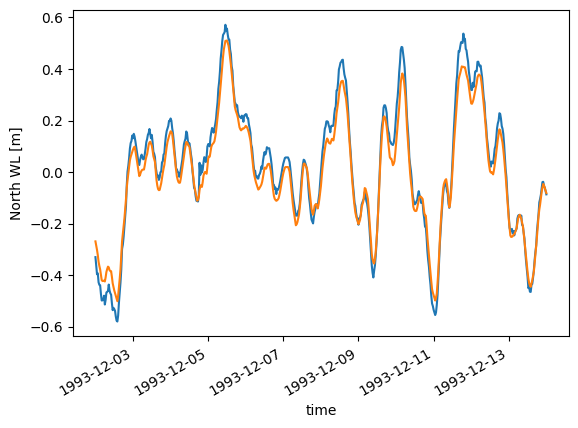

In [6]:
da.plot.timeseries();

**Inline exercise**

*Are there other possible visualizations?*

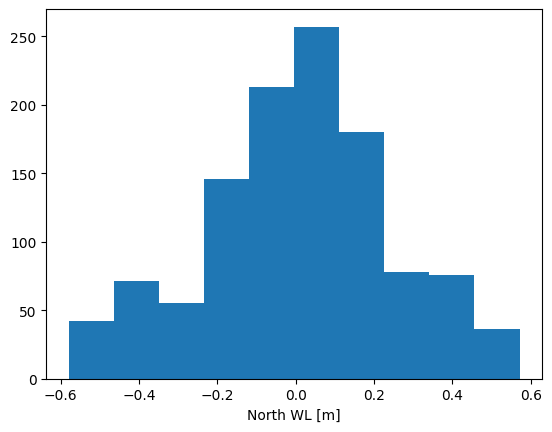

In [7]:
# bar plot
da.plot.hist();

Spatial subsetting can be done in two ways:
1. positional index using `.isel()` x=0..(nx-1) (or with negative indexing from the end)
2. distance along the axis using `sel()` x=0..8800 (pick closest node)

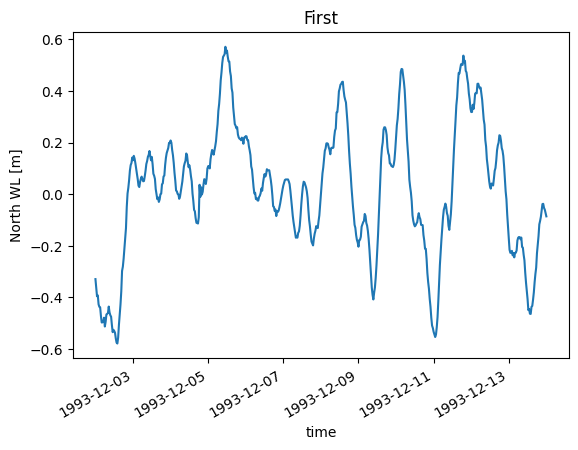

In [8]:
# to plot the first x point
da.isel(x=0).plot(title="First");

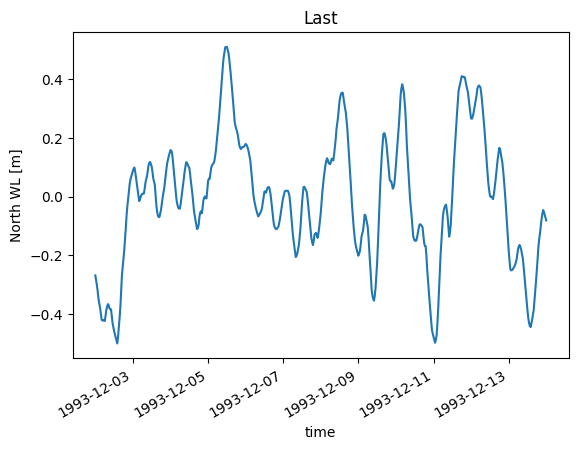

In [9]:
# to plot the last x point
da.isel(x=-1).plot(title="Last");

<Axes: title={'center': 'Last (x=8800)'}, xlabel='time', ylabel='North WL [m]'>

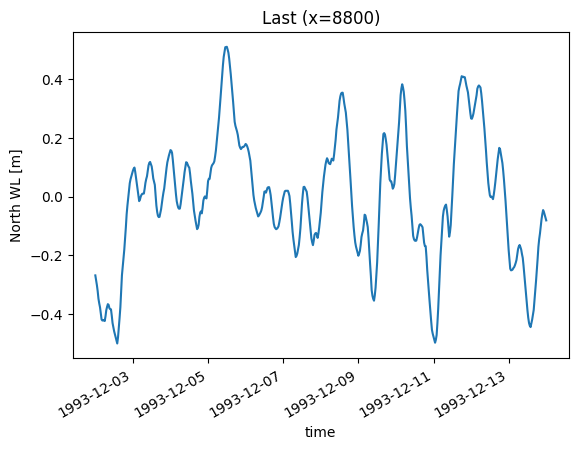

In [10]:
# to plot the point where the coordinate x is 8800 
da.sel(x=8800).plot(title="Last (x=8800)")

## Calculated items

Creating a new dataarray in the dataset based on an existing dataarray is easy.

In [11]:
ds["North WL calibrated"] = da + 0.1 # add 0.1 m to the original data

## Export to dfs0

After subsetting into a single spatial point the result no longer has any spatial dimension and has become a simple timeseries which can be saved as a dfs0 file.

In [12]:
ds.isel(x=0)

<mikeio.Dataset>
dims: (time:577)
time: 1993-12-02 00:00:00 - 1993-12-14 00:00:00 (577 records)
geometry: GeometryUndefined()
items:
  0:  North WL <Water Level> (meter)
  1:  North WL calibrated <Water Level> (meter)

In [13]:
ds.isel(x=0).geometry

GeometryUndefined()

In [14]:
ds.isel(x=0).to_dfs("random_0.dfs0")

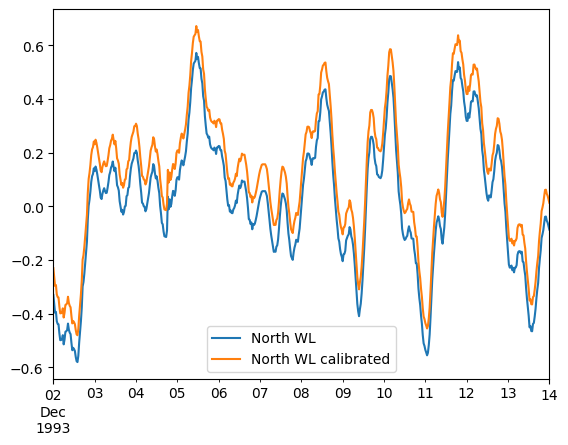

In [15]:
mikeio.read("random_0.dfs0").plot();

**Inline exercise**

*Export the timeseries in the last spatial element as a csv file*



In [16]:
# ds.isel(x=-1).to_dataframe().to_csv('demo.csv')
# another way of doing, even better!
ds.isel(x=-1).to_pandas().to_csv('demo.csv')

In [17]:
import utils
utils.sysinfo()

AttributeError: module 'utils' has no attribute 'sysinfo'